In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib.colors import to_rgb
%matplotlib inline

https://stackoverflow.com/questions/47851492/plot-curve-with-blending-line-colors-with-matplotlib-pyplot

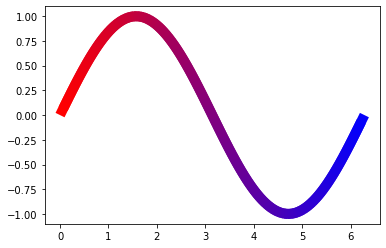

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

cmap = LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 1)])

points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-2],points[1:-1], points[2:]], axis=1)

lc = LineCollection(segments, cmap=cmap, linewidth=10)
lc.set_array(x)
plt.gca().add_collection(lc)
plt.gca().autoscale()

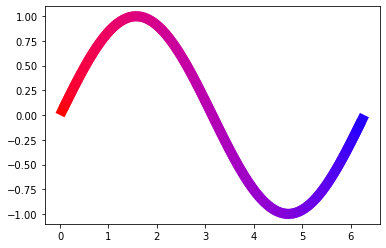

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

def colorlist2(c1, c2, num):
    l = np.linspace(0,1,num)
    a = np.abs(np.array(c1)-np.array(c2))
    m = np.min([c1,c2], axis=0)
    s  = np.sign(np.array(c2)-np.array(c1)).astype(int)
    s[s==0] =1
    r = np.sqrt(np.c_[(l*a[0]+m[0])[::s[0]],(l*a[1]+m[1])[::s[1]],(l*a[2]+m[2])[::s[2]]])
    return r

cmap = LinearSegmentedColormap.from_list("", colorlist2((1, 0, 0), (0, 0, 1),100))

points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-2],points[1:-1], points[2:]], axis=1)

lc = LineCollection(segments, cmap=cmap, linewidth=10)
lc.set_array(x)
plt.gca().add_collection(lc)
plt.gca().autoscale()
plt.show()

In [18]:
n_segments = 70
color = '#34afed'
color = to_rgb(color)
color = np.tile(np.array(color),(n_segments,1))
color = np.append(color,np.linspace(0.1,0.5,n_segments).reshape(-1,1),axis=1)
cmap = ListedColormap(color, name='line fade', N=n_segments)

# last one doesn't have overlaps which is why it is lighter?

(0, 100)

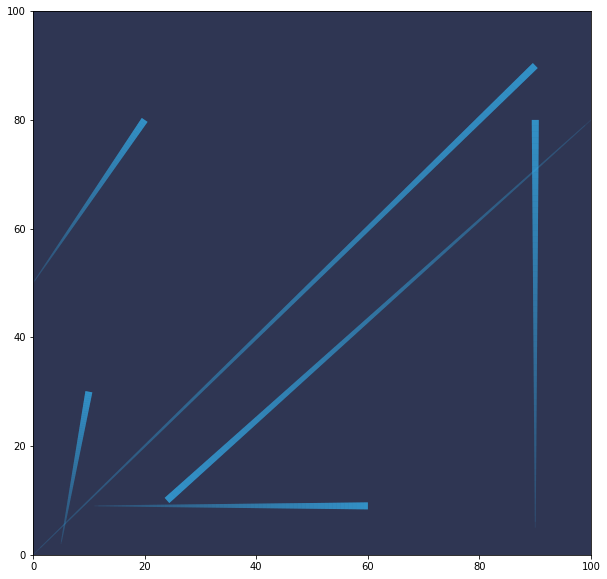

In [19]:
x1 = np.array([0,90,100,5,11,0])
x2 = np.array([20,90,24,10,60,90])
y1 = np.array([50,5,80,2,9,0])
y2 = np.array([80,80,10,30,9,90])
x = np.linspace(x1,x2,n_segments+1)
y = np.linspace(y1,y2,n_segments+1)
points = np.array([x, y]).T
points = np.concatenate([points,np.expand_dims(points[:,-1,:],1)],axis=1)
points = np.expand_dims(points,1)
segments = np.concatenate([points[:,:,:-2,:],points[:,:,1:-1,:],points[:,:,2:,:]],axis=1)
segments = np.transpose(segments,(0,2,1,3)).reshape(-1,3,2)
lw = np.linspace(1,7,n_segments)
#lc = LineCollection(segments3, cmap=cmap, linewidth=lw)
lc = LineCollection(segments, cmap=cmap, linewidth=lw,snap=False)
# TO CHANGE 100 TO PITCH LENGTH?
pitch_x = np.linspace(0,100,n_segments) 
lc.set_array(pitch_x)
plt.figure(figsize=(10,10))
plt.axvspan(0,100,0,1,facecolor='#2f3653')
plt.gca().add_collection(lc)
plt.gca().autoscale()
plt.gca().set_xlim(0,100)
plt.gca().set_ylim(0,100)